## Stock Market Prediction using Numerical & Textual Analysis

In this task we will create a Hybrid Model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines

Dataset : 

Textual Data - News Headlines : https://bit.ly/36fFPI6

Numerical Data - Stock Prices : https://finance.yahoo.com

### Created by Reshmika Dhandapani

### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

### Read the News data (Textual)

In [2]:
cols = ['Date','Category','News']
newsdata = pd.read_csv('india-news-headlines.csv', names = cols)
newsdata

C:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Category,News
0,publish_date,headline_category,headline_text
1,20010101,sports.wwe,win over cena satisfying but defeating underta...
2,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
3,20010102,unknown,Fissures in Hurriyat over Pak visit
4,20010102,unknown,America's unwanted heading for India?
...,...,...,...
3297168,20200630,gadgets-news,why tiktok removed 1 65 crore videos in india
3297169,20200630,entertainment.hindi.bollywood,apurva asrani calls alia bhatts mother soni ra...
3297170,20200630,entertainment.hindi.bollywood,kangana ranaut gets a doll version of herself ...
3297171,20200630,entertainment.hindi.bollywood,meezaan jaffrey reminisces his childhood days ...


### Removing the zeroth row

In [3]:
newsdata.drop(0, inplace=True)
newsdata.drop('Category', axis = 1, inplace=True)

### Checking for data types

In [4]:
newsdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3297172 entries, 1 to 3297172
Data columns (total 2 columns):
Date    object
News    object
dtypes: object(2)
memory usage: 75.5+ MB


### Converting data type of Date column 

In [5]:
newsdata['Date'] = pd.to_datetime(newsdata['Date'],format= '%Y%m%d')
newsdata

,Date,News
1,2001-01-01,win over cena satisfying but defeating underta...
2,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
3,2001-01-02,Fissures in Hurriyat over Pak visit
4,2001-01-02,America's unwanted heading for India?
5,2001-01-02,For bigwigs; it is destination Goa
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


##### Slicing the data to obtain only datas that have the same dates as the stock data (5 years)

In [6]:
newsdata= newsdata[2150000:]

In [7]:
newsdata

,Date,News
2150001,2015-07-28,Centre to move SC to bar Sun TV from FM auctions
2150002,2015-07-28,US house Benghazi panel says state dept to han...
2150003,2015-07-28,Centre considers separate loos for transgender...
2150004,2015-07-28,Adhir Ranjan punished for unruly behaviour; Sp...
2150005,2015-07-28,Civil society members slam govt for 'hounding'...
...,...,...
3297168,2020-06-30,why tiktok removed 1 65 crore videos in india
3297169,2020-06-30,apurva asrani calls alia bhatts mother soni ra...
3297170,2020-06-30,kangana ranaut gets a doll version of herself ...
3297171,2020-06-30,meezaan jaffrey reminisces his childhood days ...


### Grouping the headlines for each day

In [8]:
newsdata['News'] = newsdata.groupby(['Date']).transform(lambda x : ' '.join(x)) 
newsdata = newsdata.drop_duplicates() 
newsdata

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,News
2150001,2015-07-28,Centre to move SC to bar Sun TV from FM auctio...
2150129,2015-07-29,Top 8 Indian veggies to beat the heat this sum...
2150826,2015-07-30,ATP 500: Hamburg Open International Championsh...
2151518,2015-07-31,Are you sparing the rod? Why one-night stands ...
2152214,2015-08-01,Fix THESE weight training mistakes; right away...
...,...,...
3294594,2020-06-26,Containment zone residents slam high prices ch...
3295094,2020-06-27,like me i wont let you have a toxic relationsh...
3295621,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
3296121,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


In [9]:
newsdata.reset_index(inplace = True, drop = True)
newsdata

,Date,News
0,2015-07-28,Centre to move SC to bar Sun TV from FM auctio...
1,2015-07-29,Top 8 Indian veggies to beat the heat this sum...
2,2015-07-30,ATP 500: Hamburg Open International Championsh...
3,2015-07-31,Are you sparing the rod? Why one-night stands ...
4,2015-08-01,Fix THESE weight training mistakes; right away...
...,...,...
1795,2020-06-26,Containment zone residents slam high prices ch...
1796,2020-06-27,like me i wont let you have a toxic relationsh...
1797,2020-06-28,Atanu Ghosh plans to rewrite old scripts to ma...
1798,2020-06-29,6 hot and stylish bikini looks of Katrina Kaif...


### Cleaning the headlines

In [10]:
newsdata['News']=newsdata['News'].apply(lambda elem: re.sub("[^a-zA-Z]", " ", str(elem)))
newsdata['News']=newsdata['News'].str.lower()
words_descriptions = newsdata['News'].str.split()

stopword_list = stopwords.words('english')
ps = PorterStemmer()
words_descriptions = words_descriptions.apply(lambda elem: [word for word in elem if not word in stopword_list])
words_descriptions = words_descriptions.apply(lambda elem: [ps.stem(word) for word in elem])

newsdata['News'] = words_descriptions.apply(lambda elem: ' '.join(elem))
newsdata['News'].head()

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata

0    centr move sc bar sun tv fm auction us hous be...
1    top indian veggi beat heat summer decor secret...
2    atp hamburg open intern championship cup ac mi...
3    spare rod one night stand bad idea do ts offic...
4    fix weight train mistak right away correct com...
Name: News, dtype: object

In [11]:
newsdata

,Date,News
0,2015-07-28,centr move sc bar sun tv fm auction us hous be...
1,2015-07-29,top indian veggi beat heat summer decor secret...
2,2015-07-30,atp hamburg open intern championship cup ac mi...
3,2015-07-31,spare rod one night stand bad idea do ts offic...
4,2015-08-01,fix weight train mistak right away correct com...
...,...,...
1795,2020-06-26,contain zone resid slam high price charg veget...
1796,2020-06-27,like wont let toxic relationship food major ra...
1797,2020-06-28,atanu ghosh plan rewrit old script make relev ...
1798,2020-06-29,hot stylish bikini look katrina kaif anna eden...


### Functions to obtain subjectivity and polarity

In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return  TextBlob(text).sentiment.polarity

#Adding subjectivity and polarity columns
newsdata['Subjectivity'] = newsdata['News'].apply(getSubjectivity)
newsdata['Polarity'] = newsdata['News'].apply(getPolarity)
newsdata

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Date,News,Subjectivity,Polarity
0,2015-07-28,centr move sc bar sun tv fm auction us hous be...,0.312128,0.095333
1,2015-07-29,top indian veggi beat heat summer decor secret...,0.383486,0.088088
2,2015-07-30,atp hamburg open intern championship cup ac mi...,0.378146,0.062041
3,2015-07-31,spare rod one night stand bad idea do ts offic...,0.373151,0.046151
4,2015-08-01,fix weight train mistak right away correct com...,0.388560,0.095885
...,...,...,...,...
1795,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958
1796,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784
1797,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209
1798,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782


### Graphical Representation of subjectivity and polarity

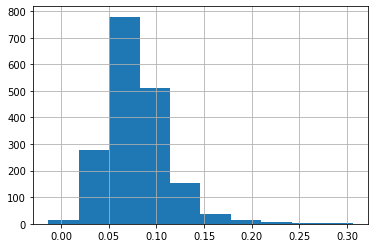

In [13]:
newsdata['Polarity'].hist()

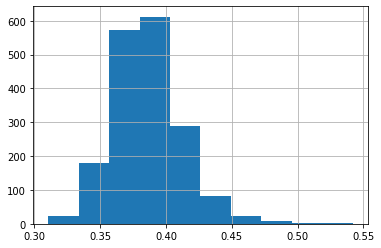

In [14]:
newsdata['Subjectivity'].hist()

### Obtaining the sentiment scores to news data

In [15]:
senti = SentimentIntensityAnalyzer()

newsdata['Compound'] = [senti.polarity_scores(v)['compound'] for v in newsdata['News']]
newsdata['Negative'] = [senti.polarity_scores(v)['neg'] for v in newsdata['News']]
newsdata['Neutral'] = [senti.polarity_scores(v)['neu'] for v in newsdata['News']]
newsdata['Positive'] = [senti.polarity_scores(v)['pos'] for v in newsdata['News']]
newsdata

C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

,Date,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-07-28,centr move sc bar sun tv fm auction us hous be...,0.312128,0.095333,-0.9952,0.165,0.733,0.102
1,2015-07-29,top indian veggi beat heat summer decor secret...,0.383486,0.088088,-0.9994,0.133,0.762,0.105
2,2015-07-30,atp hamburg open intern championship cup ac mi...,0.378146,0.062041,-0.9995,0.129,0.775,0.096
3,2015-07-31,spare rod one night stand bad idea do ts offic...,0.373151,0.046151,-0.9997,0.130,0.789,0.081
4,2015-08-01,fix weight train mistak right away correct com...,0.388560,0.095885,-0.9998,0.133,0.787,0.080
...,...,...,...,...,...,...,...,...
1795,2020-06-26,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
1796,2020-06-27,like wont let toxic relationship food major ra...,0.372264,0.064784,-0.9998,0.139,0.790,0.070
1797,2020-06-28,atanu ghosh plan rewrit old script make relev ...,0.378165,0.054209,-0.9998,0.136,0.800,0.064
1798,2020-06-29,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


### Reading the Stock Data (Numerical)

In [16]:
stockprice = pd.read_csv('^BSESN.csv')

In [17]:
stockprice.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-17,25596.630859,25831.310547,25448.320313,25803.779297,25803.779297,22700.0
1,2015-12-18,25764.669922,25789.509766,25481.509766,25519.220703,25519.220703,10400.0
2,2015-12-21,25425.320313,25757.839844,25413.539063,25735.900391,25735.900391,8100.0
3,2015-12-22,25731.070313,25787.210938,25485.169922,25590.650391,25590.650391,8100.0
4,2015-12-23,25697.660156,25875.269531,25689.699219,25850.300781,25850.300781,6900.0


In [18]:
stockprice.shape

(1234, 7)

In [19]:
stockprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 7 columns):
Date         1234 non-null object
Open         1229 non-null float64
High         1229 non-null float64
Low          1229 non-null float64
Close        1229 non-null float64
Adj Close    1229 non-null float64
Volume       1229 non-null float64
dtypes: float64(6), object(1)
memory usage: 67.6+ KB


In [20]:
#Converting Date column to datetime datatype
stockprice['Date'] = pd.to_datetime(stockprice['Date'])

In [21]:
stockprice.isnull()

,Date,Open,High,Low,Close,Adj Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1229,False,False,False,False,False,False,False
1230,False,False,False,False,False,False,False
1231,False,False,False,False,False,False,False
1232,False,False,False,False,False,False,False


In [22]:
stockprice.dropna(inplace = True)

### Min, Max and Mean price for the last 90 days.

In [23]:
print ("Max Price :" , stockprice.tail(90)['Close'].max())
print ("Min Price :" , stockprice.tail(90)['Close'].min())
print ("Mean Price :" , stockprice.tail(90)['Close'].mean())

Max Price : 46666.460938
Min Price : 36553.601563
Mean Price : 40751.538672


### Plotting the closing price day wise 

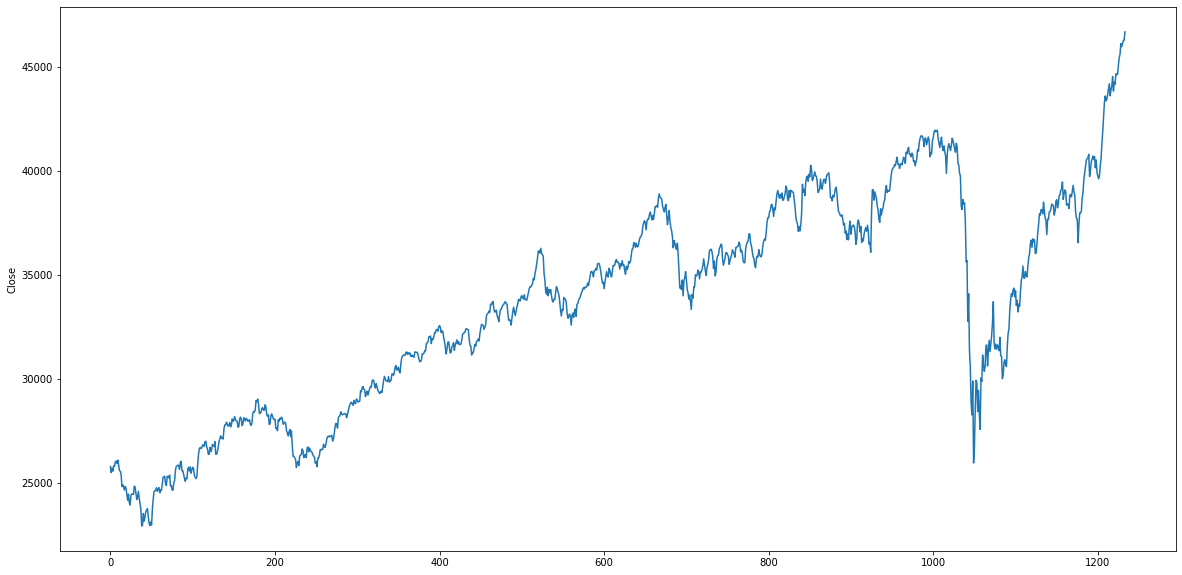

In [24]:
plt.subplots(figsize=(20, 10))
sns.lineplot(data=stockprice, x=stockprice.index, y='Close')
plt.show()

### Plotting the moving average

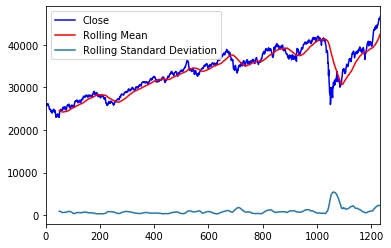

In [25]:
close = stockprice['Close']
m = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

stockprice['Close'].plot(color = 'b', label = 'Close')
m.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

### Calculating the monthwise Volume Weighted Average Price (VWAP)

In [26]:
stockprice['Month'] = pd.DatetimeIndex(stockprice['Date']).month
stockprice['Year'] = pd.DatetimeIndex(stockprice['Date']).year
stockprice['VWAP'] = (stockprice['Close'] * stockprice['Volume']).cumsum() / stockprice['Volume'].fillna(0).cumsum()
stockprice_vwap = stockprice[['Month','Year','VWAP']]
group = stockprice_vwap.groupby(['Month','Year'])
group.first()

VWAP
Month Year              
1     2016  25801.892542
      2017  26252.729190
      2018  28940.716457
      2019  35645.745442
      2020  35951.959262
...                  ...
12    2016  26244.324421
      2017  28792.448260
      2018  30890.282961
      2019  35944.437356
      2020  35950.652913

[61 rows x 1 columns]

### Merging the Textual and Numerical Data to create a hybrid model

In [27]:
df_merge = pd.merge(stockprice, newsdata, how='inner', on='Date')
df_merge

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,VWAP,News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2015-12-17,25596.630859,25831.310547,25448.320313,25803.779297,25803.779297,22700.0,12,2015,25803.779297,sex secret everi woman must know manag boss ap...,0.382725,0.086907,-0.9994,0.135,0.763,0.102
1,2015-12-18,25764.669922,25789.509766,25481.509766,25519.220703,25519.220703,10400.0,12,2015,25714.371159,stop make diet disast get sexi leg myth fact m...,0.410943,0.076559,-0.9997,0.138,0.769,0.093
2,2015-12-21,25425.320313,25757.839844,25413.539063,25735.900391,25735.900391,8100.0,12,2015,25718.603848,bollywood expens film deepika padukon film rej...,0.400018,0.054775,-0.9995,0.138,0.760,0.102
3,2015-12-22,25731.070313,25787.210938,25485.169922,25590.650391,25590.650391,8100.0,12,2015,25697.581069,bread make fat truth type pain treat home barj...,0.398132,0.085211,-0.9998,0.147,0.759,0.094
4,2015-12-23,25697.660156,25875.269531,25689.699219,25850.300781,25850.300781,6900.0,12,2015,25716.331354,decod disturb sexual dream top way prevent dia...,0.385927,0.056740,-0.9999,0.154,0.760,0.085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1106,2020-06-24,35679.738281,35706.550781,34794.929688,34868.980469,34868.980469,26600.0,6,2020,35931.619029,never thought voic today vidya rajput never th...,0.368654,0.077799,-0.9997,0.126,0.807,0.067
1107,2020-06-25,34525.390625,35081.609375,34499.781250,34842.101563,34842.101563,24600.0,6,2020,35931.538847,truck firm look new export market sell bs rang...,0.362784,0.011935,-0.9999,0.153,0.795,0.052
1108,2020-06-26,35144.781250,35254.878906,34910.339844,35171.269531,35171.269531,24800.0,6,2020,35931.482445,contain zone resid slam high price charg veget...,0.330257,0.066958,-0.9998,0.142,0.789,0.069
1109,2020-06-29,34926.949219,35032.359375,34662.058594,34961.519531,34961.519531,18300.0,6,2020,35931.429349,hot stylish bikini look katrina kaif anna eden...,0.373210,0.060782,-0.9998,0.130,0.800,0.070


### New Dataframe with required parameters

In [28]:
df = df_merge[['Close','Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
df

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,25803.779297,0.382725,0.086907,-0.9994,0.135,0.763,0.102
1,25519.220703,0.410943,0.076559,-0.9997,0.138,0.769,0.093
2,25735.900391,0.400018,0.054775,-0.9995,0.138,0.760,0.102
3,25590.650391,0.398132,0.085211,-0.9998,0.147,0.759,0.094
4,25850.300781,0.385927,0.056740,-0.9999,0.154,0.760,0.085
...,...,...,...,...,...,...,...
1106,34868.980469,0.368654,0.077799,-0.9997,0.126,0.807,0.067
1107,34842.101563,0.362784,0.011935,-0.9999,0.153,0.795,0.052
1108,35171.269531,0.330257,0.066958,-0.9998,0.142,0.789,0.069
1109,34961.519531,0.373210,0.060782,-0.9998,0.130,0.800,0.070


### Data Preprocessing: Using MinMaxScaler for scaling the values

In [29]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df

,0,1,2,3,4,5,6
0,0.150096,0.297315,0.314440,0.000306,0.480392,0.282051,0.6750
1,0.135120,0.421959,0.281978,0.000153,0.509804,0.333333,0.5625
2,0.146524,0.373703,0.213641,0.000255,0.509804,0.256410,0.6750
3,0.138879,0.365372,0.309119,0.000102,0.598039,0.247863,0.5750
4,0.152545,0.311459,0.219805,0.000051,0.666667,0.256410,0.4625
...,...,...,...,...,...,...,...
1106,0.627192,0.235158,0.285869,0.000153,0.392157,0.658120,0.2375
1107,0.625777,0.209226,0.079248,0.000051,0.656863,0.555556,0.0500
1108,0.643101,0.065544,0.251859,0.000102,0.549020,0.504274,0.2625
1109,0.632062,0.255284,0.232484,0.000102,0.431373,0.598291,0.2750


In [30]:
new_df.columns = df.columns
new_df.index = df.index
new_df.head()

,Close,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.150096,0.297315,0.314440,0.000306,0.480392,0.282051,0.6750
1,0.135120,0.421959,0.281978,0.000153,0.509804,0.333333,0.5625
2,0.146524,0.373703,0.213641,0.000255,0.509804,0.256410,0.6750
3,0.138879,0.365372,0.309119,0.000102,0.598039,0.247863,0.5750
4,0.152545,0.311459,0.219805,0.000051,0.666667,0.256410,0.4625


### Splitting test and train data

In [31]:
X = new_df.drop('Close', axis=1)
y =new_df['Close']

In [32]:
X.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.297315,0.314440,0.000306,0.480392,0.282051,0.6750
1,0.421959,0.281978,0.000153,0.509804,0.333333,0.5625
2,0.373703,0.213641,0.000255,0.509804,0.256410,0.6750
3,0.365372,0.309119,0.000102,0.598039,0.247863,0.5750
4,0.311459,0.219805,0.000051,0.666667,0.256410,0.4625


In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape

(888, 6)

### Using Decision Tree Model

In [34]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)

In [35]:
predictions

array([0.84301565, 0.2582928 , 0.26055905, 0.87162444, 0.55319457,
       0.27370272, 0.51410102, 0.65684399, 0.0876353 , 0.62203809,
       0.43849791, 0.94027143, 0.53809158, 0.71718726, 0.84301565,
       0.60002525, 0.57195858, 0.59721903, 0.31443569, 0.10256415,
       0.52718045, 0.22365692, 0.8096992 , 0.27251537, 0.86316591,
       0.61388465, 0.56045958, 0.95671461, 0.07911294, 0.84301565,
       0.28328918, 0.48821313, 0.66250031, 0.81352634, 0.71917916,
       0.08073972, 0.53232394, 0.26492091, 0.87102763, 0.66871027,
       0.12883093, 0.26841131, 0.5069534 , 0.97413966, 0.16315001,
       0.71718726, 0.98284344, 0.66527045, 0.93164021, 0.09123773,
       0.70093054, 0.44401083, 0.02263268, 0.43492245, 0.45118364,
       0.76052898, 0.8298988 , 0.20133991, 0.83786167, 0.25422194,
       0.01263845, 0.79325828, 0.80475451, 0.40160256, 0.71718726,
       0.15009628, 0.76753773, 0.71408213, 0.69075457, 0.28796949,
       0.63606855, 0.8674957 , 0.65450137, 0.09105929, 0.42901

### MSE

In [36]:
mean_squared_error(predictions,y_test)

0.08374677252439144

### Using Random Forest Model

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction=rf.predict(x_test)

In [38]:
prediction

array([0.51768399, 0.40149447, 0.37721034, 0.74959942, 0.38443355,
       0.38870501, 0.50704069, 0.41270395, 0.38809193, 0.45071323,
       0.38380909, 0.79943836, 0.44754044, 0.61135751, 0.77981042,
       0.40492284, 0.54877379, 0.66642233, 0.61414836, 0.47514294,
       0.60781157, 0.44062363, 0.36367345, 0.62008067, 0.70188337,
       0.53957805, 0.59885775, 0.55497275, 0.34491428, 0.66269199,
       0.47689692, 0.38031884, 0.43026245, 0.68887504, 0.64730762,
       0.36287618, 0.55043595, 0.26931369, 0.71392555, 0.61915861,
       0.29774349, 0.59102748, 0.44676643, 0.56511957, 0.44385675,
       0.71685032, 0.79044341, 0.72978258, 0.52493857, 0.3895935 ,
       0.45391177, 0.49273611, 0.56936331, 0.40923397, 0.48996999,
       0.54515492, 0.6658825 , 0.31644968, 0.73395009, 0.28026751,
       0.3243335 , 0.59853794, 0.32604388, 0.61611941, 0.70586365,
       0.25290532, 0.74697315, 0.53168158, 0.50784277, 0.50246685,
       0.63457371, 0.63030518, 0.43434859, 0.32542716, 0.69447

### MSE

In [39]:
mean_squared_error(prediction,y_test)

0.04696013438011045

### We can observe that Random Forest Algorithm gives the best results with MSE of 0.047. 

## Thank You